# ETL_EDA: net migration by countries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter

In [2]:
pd.options.display.float_format = '{:,.0f}'.format

In [3]:
import warnings

def disable_pandas_warnings():
    warnings.resetwarnings()  # Maybe somebody else is messing with the warnings system?
    warnings.filterwarnings('ignore')  # Ignore everything
    # ignore everything does not work: ignore specific messages, using regex
    warnings.filterwarnings('ignore', '.*A value is trying to be set on a copy of a slice from a DataFrame.*')
    warnings.filterwarnings('ignore', '.indexing past lexsort depth may impact performance')
disable_pandas_warnings()

In [4]:
df = pd.read_csv('dataSets\\countries_net_migration_intermedio.csv')

In [5]:
df.head()

,country_name,country_code,net_migration_1990,net_migration_1991,net_migration_1992,net_migration_1993,net_migration_1994,net_migration_1995,net_migration_1996,net_migration_1997,...,net_migration_2011,net_migration_2012,net_migration_2013,net_migration_2014,net_migration_2015,net_migration_2016,net_migration_2017,net_migration_2018,net_migration_2019,net_migration_2020
0,ARUBA,ABW,879,"1,946","1,294","1,662","1,668","1,598","1,636","1,656",...,315,229,134,88,177,170,218,367,412,0
1,AFGHANISTAN,AFG,"-666,001","39,926","1,834,556","1,171,818","665,410","71,824","27,194","6,129",...,"418,796","105,905","48,076","255,611","-281,739","-90,238","-47,090","-47,205","-8,082","166,821"
2,ANGOLA,AGO,"47,663","33,925","39,196","38,883","45,272","40,855","45,356","49,960",...,"94,709","96,056","91,528","84,532","74,170","91,623","77,733","61,632","58,986","7,557"
3,ALBANIA,ALB,"-52,723","-56,599","-59,634","-61,925","-63,700","-65,106","-65,800","-65,975",...,"-24,465","-19,946","-16,845","-14,265","-12,240","-10,887","-9,768","-9,106","-8,889","-9,117"
4,ANDORRA,AND,"1,589","1,501","1,446","1,530","1,474","1,588",182,140,...,27,33,12,-84,-232,"1,303",887,"1,184","1,238","1,474"


In [6]:
df.describe()

,net_migration_1990,net_migration_1991,net_migration_1992,net_migration_1993,net_migration_1994,net_migration_1995,net_migration_1996,net_migration_1997,net_migration_1998,net_migration_1999,...,net_migration_2011,net_migration_2012,net_migration_2013,net_migration_2014,net_migration_2015,net_migration_2016,net_migration_2017,net_migration_2018,net_migration_2019,net_migration_2020
count,217,217,217,217,217,217,217,217,217,217,...,217,217,217,217,217,217,217,217,217,217
mean,194,150,167,201,204,175,168,137,46,69,...,-159,-143,-153,-176,-126,-125,-151,-152,-147,-135
std,"189,784","160,080","222,688","218,412","241,684","151,037","184,020","156,500","147,621","139,078",...,"153,788","186,073","240,742","225,286","210,643","213,345","179,763","185,254","164,552","118,320"
min,"-1,196,051","-757,481","-1,320,633","-1,595,940","-2,162,873","-625,725","-777,896","-528,084","-448,726","-492,597",...,"-890,633","-1,647,986","-2,081,259","-2,037,911","-2,172,159","-2,290,411","-1,574,581","-1,356,759","-1,177,218","-1,025,295"
25%,"-12,986","-16,473","-20,270","-17,257","-21,003","-22,996","-22,473","-20,429","-21,441","-21,131",...,"-20,040","-20,983","-16,845","-20,445","-16,833","-13,520","-13,082","-14,451","-16,270","-9,189"
50%,-666,-526,-516,-522,-802,-763,-754,-821,-767,-734,...,-934,-880,-899,-799,-866,-374,-403,-807,"-1,296",-297
75%,"4,605","5,419","7,113","8,887","5,091","6,465","5,469","6,023","6,378","5,728",...,"7,057","9,009","10,496","7,105","7,934","13,251","9,563","10,096","4,948","2,573"
max,"1,421,775","1,569,223","1,834,556","1,752,153","1,806,698","1,678,815","1,771,618","1,866,819","1,799,996","1,667,953",...,"1,322,433","1,323,368","1,320,840","1,250,914","1,221,849","1,449,371","1,377,630","1,200,796","1,158,444","675,560"


In [7]:
#df.info()

### Check for null values

In [8]:
df.isna().any().sum()

0

### Check for duplicates

In [9]:
dfdups = df[df.duplicated()]

In [10]:
dfdups

,country_name,country_code,net_migration_1990,net_migration_1991,net_migration_1992,net_migration_1993,net_migration_1994,net_migration_1995,net_migration_1996,net_migration_1997,...,net_migration_2011,net_migration_2012,net_migration_2013,net_migration_2014,net_migration_2015,net_migration_2016,net_migration_2017,net_migration_2018,net_migration_2019,net_migration_2020


### Normalize the country names

In [11]:
est = pd.read_csv('dataSets\\estandar_paises_regiones.csv')

In [12]:
# We save the unique country names from each dataframe
countries_df = set(df['country_name'])
countries_est = set(est['country_name'])

In [13]:
# We identify the dataframe with fewer countries (which should be the main dataframe in this notebook)
if len(countries_df) <= len(countries_est):
    df_fewer_countries = df
    df_more_countries = est
else:
    df_fewer_countries = est
    df_more_countries = df

In [14]:
# We get the unique country names from the dataframe with fewer countries
countries_fewer = set(df_fewer_countries['country_name'])

In [15]:
# We get the unique country names from the dataframe with more countries
countries_more = set(df_more_countries['country_name'])

In [16]:
# Get unique country names that are in the dataframe with fewer countries but not in the dataframe with more countries
unique_countries = countries_fewer.difference(countries_more)

#### The following countries' names should be replaced in our dataframe df 

In [17]:
unique_countries

{'BAHAMAS, THE',
 'CHANNEL ISLANDS',
 'CONGO, DEM. REP.',
 'CONGO, REP.',
 "COTE D'IVOIRE",
 'CURACAO',
 'EGYPT, ARAB REP.',
 'GAMBIA, THE',
 'HONG KONG SAR, CHINA',
 'IRAN, ISLAMIC REP.',
 "KOREA, DEM. PEOPLE'S REP.",
 'KOREA, REP.',
 'KYRGYZ REPUBLIC',
 'LAO PDR',
 'MACAO SAR, CHINA',
 'MICRONESIA, FED. STS.',
 'RUSSIAN FEDERATION',
 'SINT MAARTEN (DUTCH PART)',
 'SLOVAK REPUBLIC',
 'ST. KITTS AND NEVIS',
 'ST. LUCIA',
 'ST. MARTIN (FRENCH PART)',
 'ST. VINCENT AND THE GRENADINES',
 'TURKIYE',
 'VENEZUELA, RB',
 'VIETNAM',
 'VIRGIN ISLANDS (U.S.)',
 'WEST BANK AND GAZA',
 'YEMEN, REP.'}

In [18]:
replacements = {
    'BAHAMAS, THE': "BAHAMAS",
 'CHANNEL ISLANDS': 'UNITED STATES',
 'CONGO, DEM. REP.': 'DEMOCRATIC REPUBLIC OF THE CONGO',
 'CONGO, REP.': 'CONGO',
 "COTE D'IVOIRE": 'CÔTE D’IVOIRE',
 'CURACAO': 'CURAÇAO',
 'EGYPT, ARAB REP.': 'EGYPT',
 'GAMBIA, THE': 'GAMBIA',
 'HONG KONG SAR, CHINA': 'HONG KONG',
 'IRAN, ISLAMIC REP.': 'IRAN',
 "KOREA, DEM. PEOPLE'S REP.": 'NORTH KOREA',
 'KOREA, REP.': 'SOUTH KOREA',
 'KYRGYZ REPUBLIC': 'KYRGYZSTAN',
 'LAO PDR': 'LAOS',
 'MACAO SAR, CHINA': 'MACAO',
 'MICRONESIA, FED. STS.': 'MICRONESIA',
 'RUSSIAN FEDERATION': 'RUSSIA',
 'SINT MAARTEN (DUTCH PART)': 'SINT MAARTEN',
 'SLOVAK REPUBLIC': 'SLOVAKIA',
 'ST. KITTS AND NEVIS': 'SAINT KITTS AND NEVIS',
 'ST. LUCIA': 'SAINT LUCIA',
 'ST. MARTIN (FRENCH PART)': 'SAINT MARTIN',
 'ST. VINCENT AND THE GRENADINES': 'SAINT VINCENT AND THE GRENADINES',
 'TURKIYE': 'TÜRKIYE',
 'VENEZUELA, RB': 'VENEZUELA',
 'VIETNAM': 'VIET NAM',
 'VIRGIN ISLANDS (U.S.)': 'UNITED STATES VIRGIN ISLANDS',
 'WEST BANK AND GAZA': 'STATE OF PALESTINE',
 'YEMEN, REP.': 'YEMEN'
}

In [19]:
df.country_name = df.country_name.replace(replacements)

### Now, let's check if it worked

In [20]:
countries_fewer = set(df_fewer_countries['country_name'])
countries_more = set(df_more_countries['country_name'])
unique_countries = countries_fewer.difference(countries_more)
unique_countries

set()

## Distribution of the migration around the world, by countries.

### Histograms

#### Early 90s

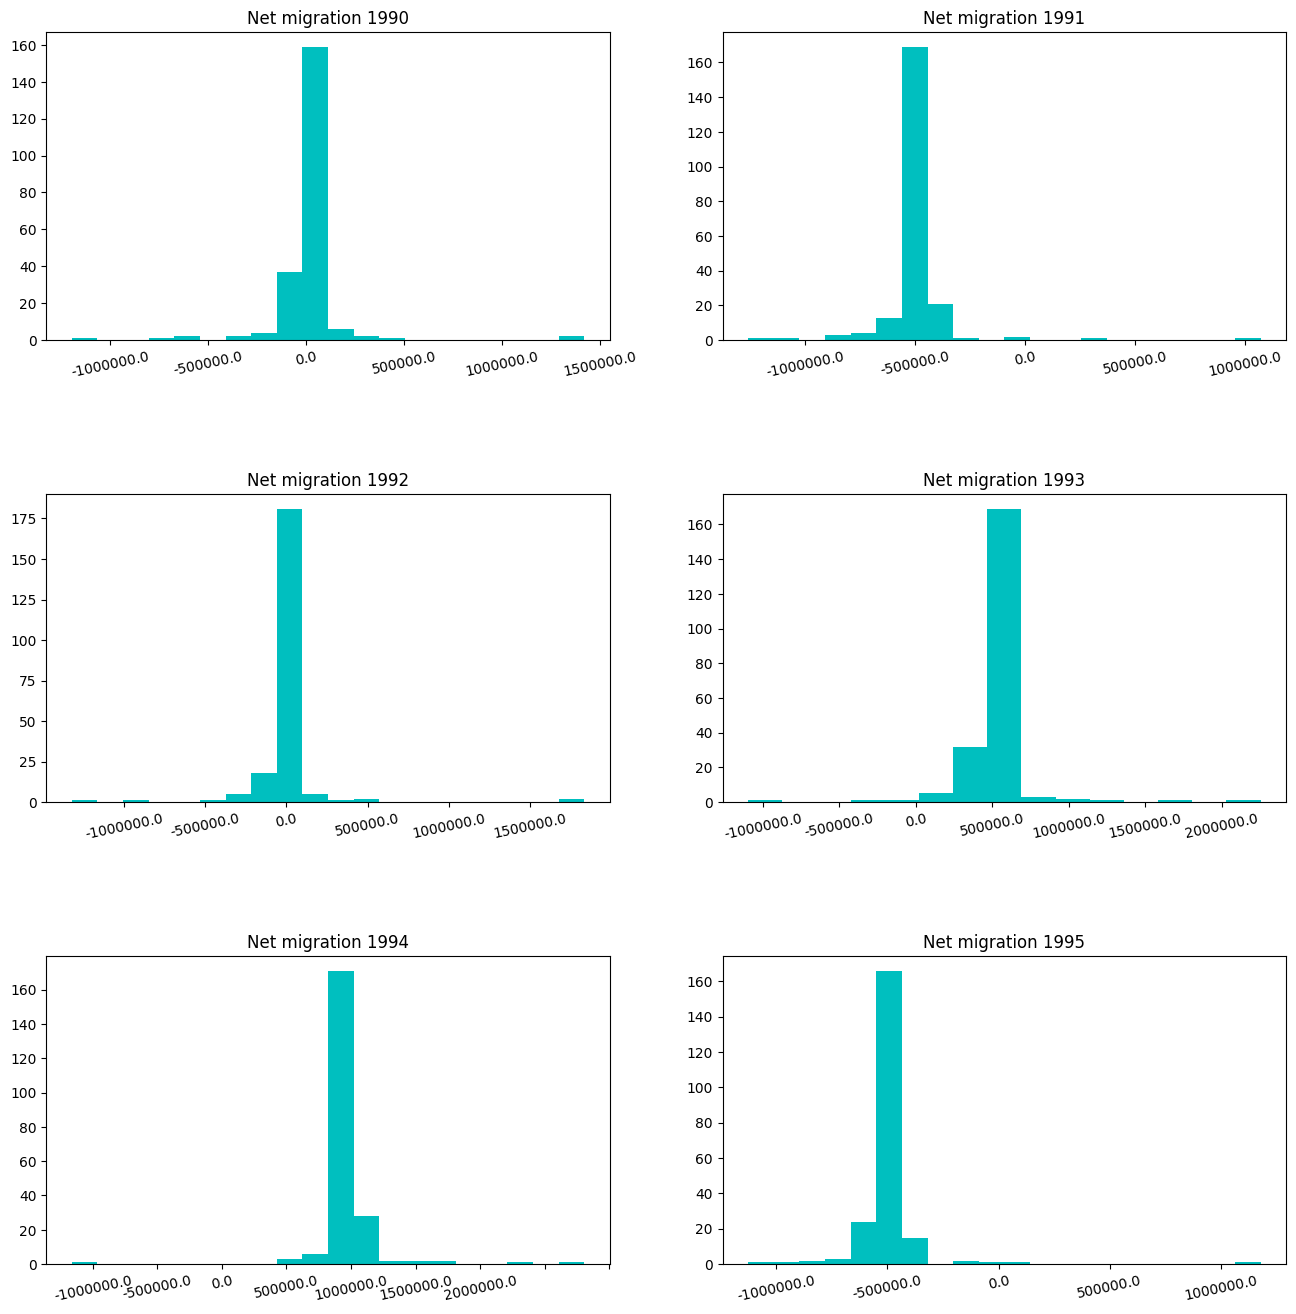

In [21]:
# Create the plot object
fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(16, 16) )

# First subplot 
ax[0,0].hist(df.net_migration_1990, bins=20, color='c')
ax[0,0].set_title("Net migration 1990")
ax[0,0].yaxis.set_major_formatter(ScalarFormatter(useMathText=False))
ax[0,0].ticklabel_format(style='plain', axis='y')
ax[0,0].ticklabel_format(style='plain', axis='x')
ax[0,0].set_xticklabels(ax[0,0].get_xticks(), rotation=12)

# Second subplot 
ax[0,1].hist(df.net_migration_1991, bins=20, color='c')
ax[0,1].set_title("Net migration 1991")
ax[0,1].yaxis.set_major_formatter(ScalarFormatter(useMathText=False))   # Helps to remove the scientifc notation
ax[0,1].ticklabel_format(style='plain', axis='y')
ax[0,1].ticklabel_format(style='plain', axis='x')
ax[0,1].set_xticklabels(ax[0,0].get_xticks(), rotation=12)

# Third subplot
ax[1,0].hist(df.net_migration_1992, bins=20, color='c')
ax[1,0].set_title("Net migration 1992")
ax[1,0].yaxis.set_major_formatter(ScalarFormatter(useMathText=False))
ax[1,0].ticklabel_format(style='plain', axis='y')
ax[1,0].ticklabel_format(style='plain', axis='x')
ax[1,0].set_xticklabels(ax[0,0].get_xticks(), rotation=12)

# fourth subplot
ax[1,1].hist(df.net_migration_1993, bins=15, color='c')
ax[1,1].set_title("Net migration 1993")
ax[1,1].yaxis.set_major_formatter(ScalarFormatter(useMathText=False))   # Helps to remove the scientifc notation
ax[1,1].ticklabel_format(style='plain', axis='y')
ax[1,1].ticklabel_format(style='plain', axis='x')
ax[1,1].set_xticklabels(ax[0,0].get_xticks(), rotation=12)

# 5
ax[2,0].hist(df.net_migration_1994, bins=20, color='c')
ax[2,0].set_title("Net migration 1994")
ax[2,0].yaxis.set_major_formatter(ScalarFormatter(useMathText=False))
ax[2,0].ticklabel_format(style='plain', axis='y')
ax[2,0].ticklabel_format(style='plain', axis='x')
ax[2,0].set_xticklabels(ax[0,0].get_xticks(), rotation=12)

# 6 
ax[2,1].hist(df.net_migration_1995, bins=20, color='c')
ax[2,1].set_title("Net migration 1995")
ax[2,1].yaxis.set_major_formatter(ScalarFormatter(useMathText=False))   # Helps to remove the scientifc notation
ax[2,1].ticklabel_format(style='plain', axis='y')
ax[2,1].ticklabel_format(style='plain', axis='x')
ax[2,1].set_xticklabels(ax[0,0].get_xticks(), rotation=12)


fig.subplots_adjust(hspace=0.5)

# Show the graphs
plt.show()

#### Late 2010s

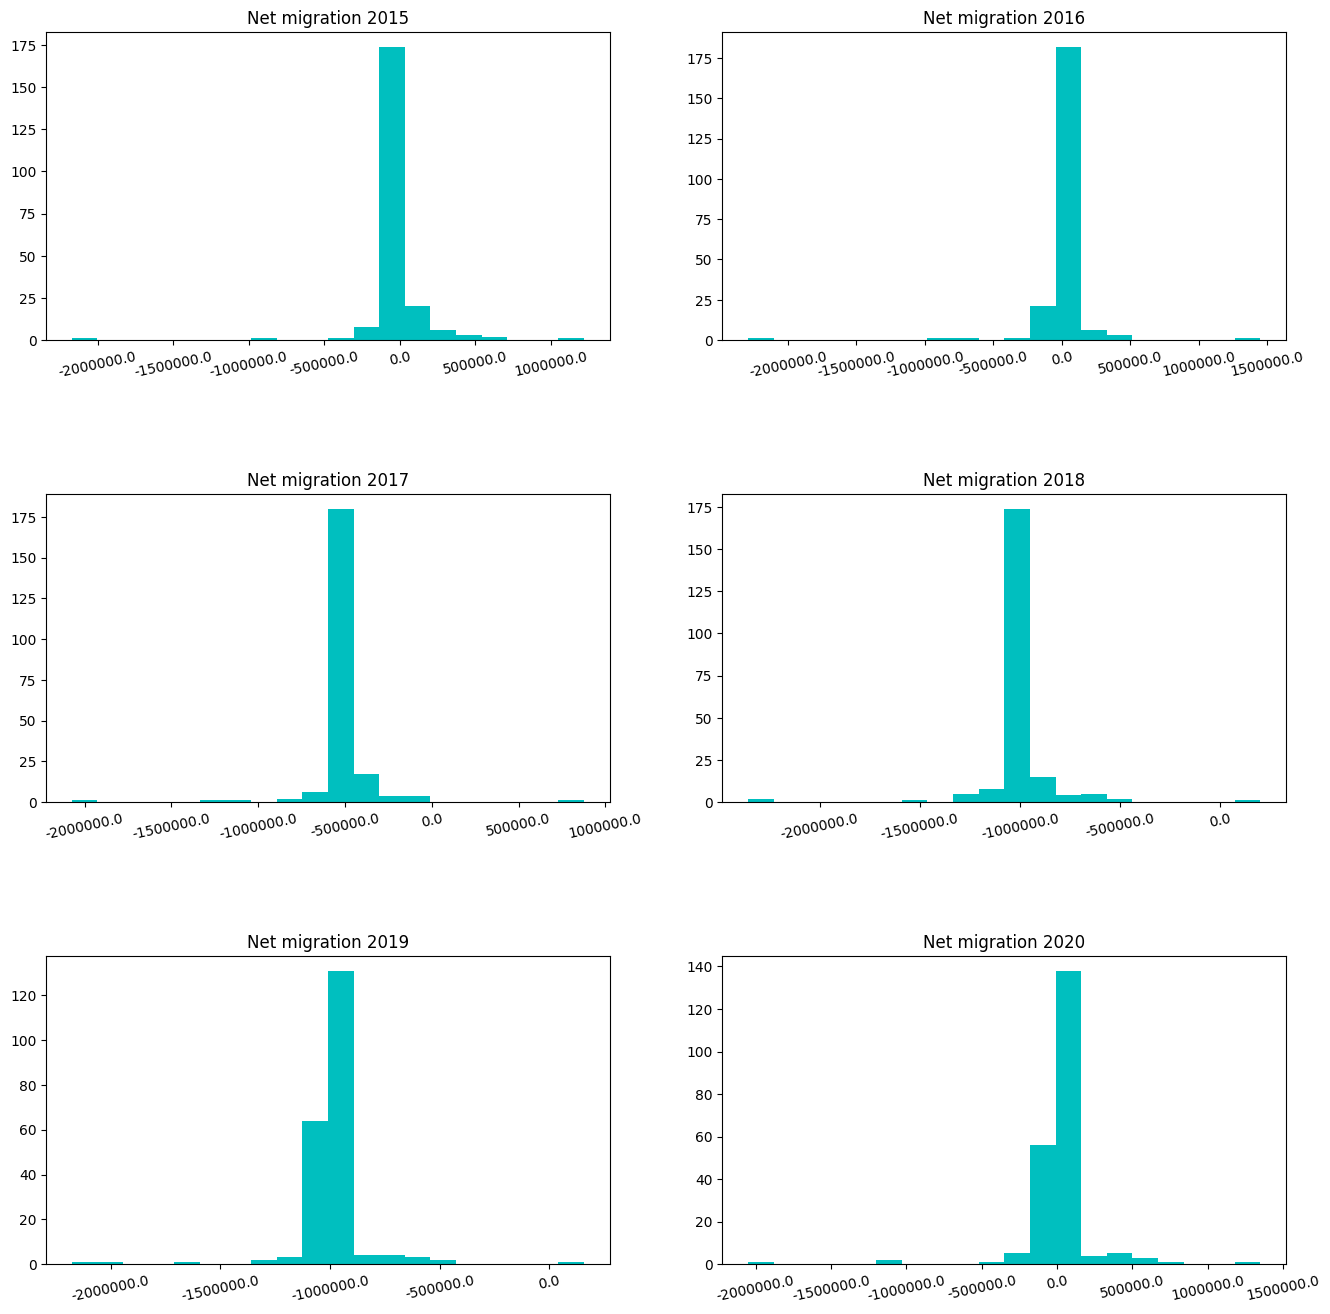

In [22]:
# # Create the plot object
fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(16, 16) )

ax[0,0].hist(df.net_migration_2015, bins=20, color='c')
ax[0,0].set_title("Net migration 2015")
ax[0,0].yaxis.set_major_formatter(ScalarFormatter(useMathText=False))
ax[0,0].ticklabel_format(style='plain', axis='y')
ax[0,0].ticklabel_format(style='plain', axis='x')
ax[0,0].set_xticklabels(ax[0,0].get_xticks(), rotation=12)

# 6 
ax[0,1].hist(df.net_migration_2016, bins=20, color='c')
ax[0,1].set_title("Net migration 2016")
ax[0,1].yaxis.set_major_formatter(ScalarFormatter(useMathText=False))   # Helps to remove the scientifc notation
ax[0,1].ticklabel_format(style='plain', axis='y')
ax[0,1].ticklabel_format(style='plain', axis='x')
ax[0,1].set_xticklabels(ax[0,0].get_xticks(), rotation=12)

ax[1,0].hist(df.net_migration_2017, bins=20, color='c')
ax[1,0].set_title("Net migration 2017")
ax[1,0].yaxis.set_major_formatter(ScalarFormatter(useMathText=False))
ax[1,0].ticklabel_format(style='plain', axis='y')
ax[1,0].ticklabel_format(style='plain', axis='x')
ax[1,0].set_xticklabels(ax[0,0].get_xticks(), rotation=12)


ax[1,1].hist(df.net_migration_2018, bins=20, color='c')
ax[1,1].set_title("Net migration 2018")
ax[1,1].yaxis.set_major_formatter(ScalarFormatter(useMathText=False))   # Helps to remove the scientifc notation
ax[1,1].ticklabel_format(style='plain', axis='y')
ax[1,1].ticklabel_format(style='plain', axis='x')
ax[1,1].set_xticklabels(ax[0,0].get_xticks(), rotation=12)

ax[2,0].hist(df.net_migration_2019, bins=20, color='c')
ax[2,0].set_title("Net migration 2019")
ax[2,0].yaxis.set_major_formatter(ScalarFormatter(useMathText=False))
ax[2,0].ticklabel_format(style='plain', axis='y')
ax[2,0].ticklabel_format(style='plain', axis='x')
ax[2,0].set_xticklabels(ax[0,0].get_xticks(), rotation=12)


ax[2,1].hist(df.net_migration_2020, bins=20, color='c')
ax[2,1].set_title("Net migration 2020")
ax[2,1].yaxis.set_major_formatter(ScalarFormatter(useMathText=False))   # Helps to remove the scientifc notation
ax[2,1].ticklabel_format(style='plain', axis='y')
ax[2,1].ticklabel_format(style='plain', axis='x')
ax[2,1].set_xticklabels(ax[0,0].get_xticks(), rotation=12)


# Adjust vertical space between subplots
fig.subplots_adjust(hspace=0.5)

# Show the graphs
plt.show()

We had to select some year columns for practical reasons. However, we can notice a couple of things. First, the shape of the distribution keeps pretty much the same throughout the studied period. Second, the peak at the center of the distribution has become higher over the years. Third, over time the number of migrants seems to have grown. We can see this in the tails of the distribution. Fourth, the number of net migrations to the right of the last graphs has decreased dramatically. We are inclined to think this is due to the difficulty in getting the data.

### Boxplots

#### 1990s decade

Text(0, 0.5, 'total')

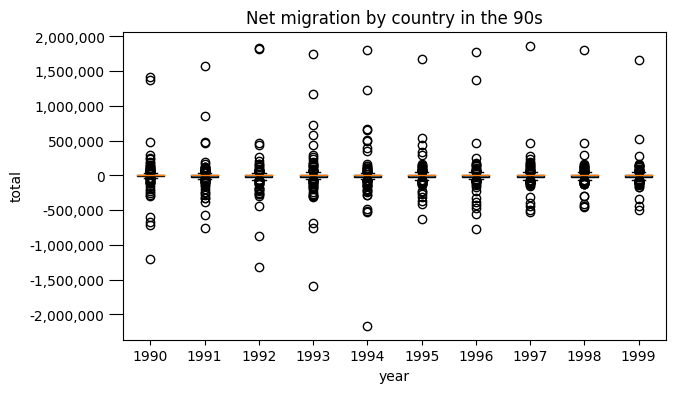

In [23]:
fig, ax = plt.subplots(figsize = (7,4))
bp1 = ax.boxplot([df.net_migration_1990, df.net_migration_1991, df.net_migration_1992, df.net_migration_1993,
                 df.net_migration_1994, df.net_migration_1995, df.net_migration_1996, df.net_migration_1997,
                  df.net_migration_1998,
                 df.net_migration_1999],
                 patch_artist=True,
                 labels=['1990','1991', '1992', '1993', '1994','1995','1996', '1997', '1998', '1999'])
ax.yaxis.set_tick_params(tickdir='out', length=10)
ax.yaxis.set_ticklabels(['{:,.0f}'.format(y) for y in ax.get_yticks()])

plt.title("Net migration by country in the 90s")
plt.xlabel("year")
plt.ylabel("total")

#### 2000s decade

In [24]:
df.columns

Index(['country_name', 'country_code', 'net_migration_1990',
       'net_migration_1991', 'net_migration_1992', 'net_migration_1993',
       'net_migration_1994', 'net_migration_1995', 'net_migration_1996',
       'net_migration_1997', 'net_migration_1998', 'net_migration_1999',
       'net_migration_2000', 'net_migration_2001', 'net_migration_2002',
       'net_migration_2003', 'net_migration_2004', 'net_migration_2005',
       'net_migration_2006', 'net_migration_2007', 'net_migration_2008',
       'net_migration_2009', 'net_migration_2010', 'net_migration_2011',
       'net_migration_2012', 'net_migration_2013', 'net_migration_2014',
       'net_migration_2015', 'net_migration_2016', 'net_migration_2017',
       'net_migration_2018', 'net_migration_2019', 'net_migration_2020'],
      dtype='object')

Text(0, 0.5, 'total')

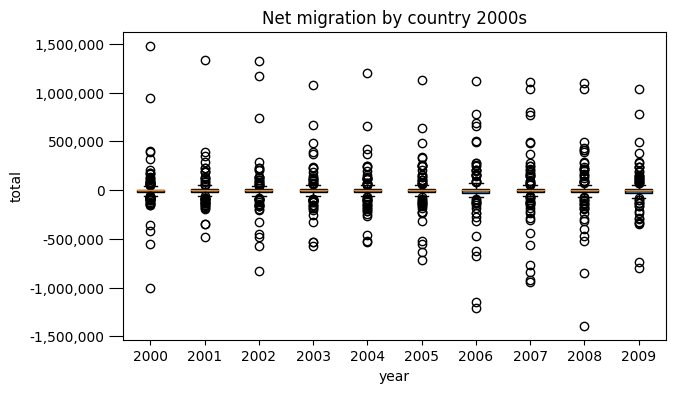

In [25]:
fig, ax = plt.subplots(figsize = (7,4))
bp1 = ax.boxplot([df.net_migration_2000, df.net_migration_2001, df.net_migration_2002, df.net_migration_2003,
                 df.net_migration_2004, df.net_migration_2005, df.net_migration_2006, df.net_migration_2007,
                  df.net_migration_2008, df.net_migration_2009],
                 patch_artist=True,
                 labels=['2000','2001', '2002', '2003', '2004','2005','2006', '2007', '2008', '2009'])
ax.yaxis.set_tick_params(tickdir='out', length=10)
ax.yaxis.set_ticklabels(['{:,.0f}'.format(y) for y in ax.get_yticks()])

plt.title("Net migration by country 2000s")
plt.xlabel("year")
plt.ylabel("total")

#### 2010-2020

Text(0, 0.5, 'total')

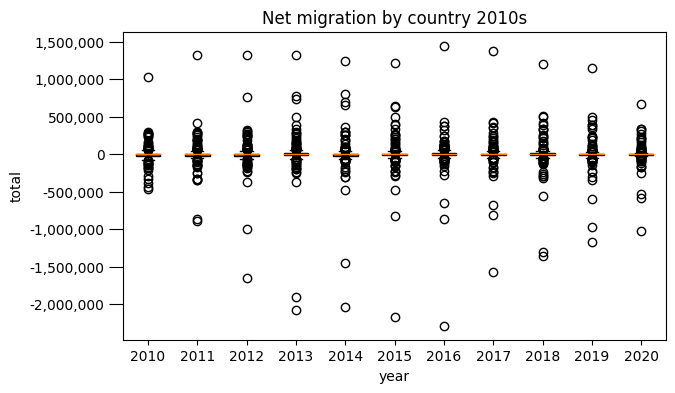

In [26]:
fig, ax = plt.subplots(figsize = (7,4))
bp1 = ax.boxplot([df.net_migration_2010, df.net_migration_2011, df.net_migration_2012, df.net_migration_2013,
                 df.net_migration_2014, df.net_migration_2015, df.net_migration_2016, df.net_migration_2017,
                  df.net_migration_2018, df.net_migration_2019, df.net_migration_2020],
                 patch_artist=True,
                 labels=['2010','2011', '2012', '2013', '2014','2015','2016', '2017', '2018', '2019','2020'])
ax.yaxis.set_tick_params(tickdir='out', length=10)
ax.yaxis.set_ticklabels(['{:,.0f}'.format(y) for y in ax.get_yticks()])

plt.title("Net migration by country 2010s")
plt.xlabel("year")
plt.ylabel("total")

We notice the constant presence of outliers in our dataset. That might be due to the differences in the population sizes. We won't treat these outliers yet, to not overlook this fact. 
Also, in the last graph we can observe a higher number of years with negative net migration, around two million, and then these numbers decrease towards the end of the studied period.

## Countries with the higher net migration

### Early 1990s

In [27]:
filtered = df.sort_values(by=['net_migration_1990'], ascending = False).reset_index(drop=True).iloc[0:10]
countries = filtered.country_name.tolist()
values = filtered.net_migration_1990.tolist()

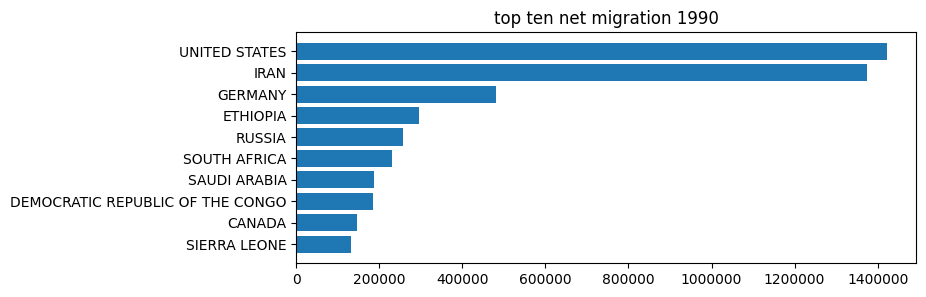

In [28]:
# Data
y_pos = [0, 1, 2, 3, 4,5,6,7,8,9]
performance = values

# Create the plot object
fig, ax = plt.subplots(figsize= (8,3))
ax.barh(y_pos, performance)

# Add labels
ax.set_yticks(y_pos)
ax.set_yticklabels(countries)

# Invert the y axis
ax.invert_yaxis()
# supress scientific notation
ax.ticklabel_format(style='plain', axis='x')
# title
plt.title("top ten net migration 1990")
# plot
plt.show()

In [29]:
filtered = df.sort_values(by=['net_migration_1991'], ascending = False).reset_index(drop=True).iloc[0:10]
countries = filtered.country_name.tolist()
values = filtered.net_migration_1991.tolist()

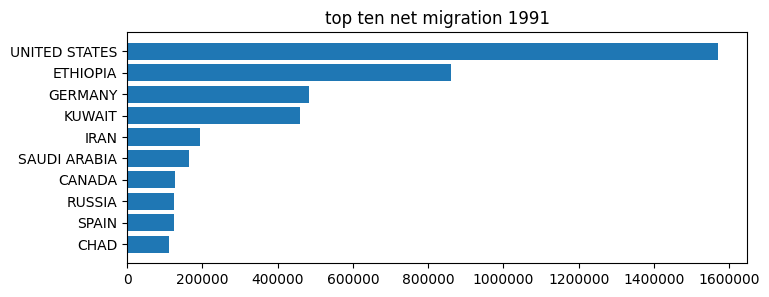

In [30]:
# Data
y_pos = [0, 1, 2, 3, 4,5,6,7,8,9]
performance = values

# Create the plot object
fig, ax = plt.subplots(figsize= (8,3))
ax.barh(y_pos, performance)

# Add labels
ax.set_yticks(y_pos)
ax.set_yticklabels(countries)

# Invert the y axis
ax.invert_yaxis()
# supress scientific notation
ax.ticklabel_format(style='plain', axis='x')
# title
plt.title("top ten net migration 1991")
# plot
plt.show()

In [31]:
filtered = df.sort_values(by=['net_migration_1992'], ascending = False).reset_index(drop=True).iloc[0:10]
countries = filtered.country_name.tolist()
values = filtered.net_migration_1992.tolist()

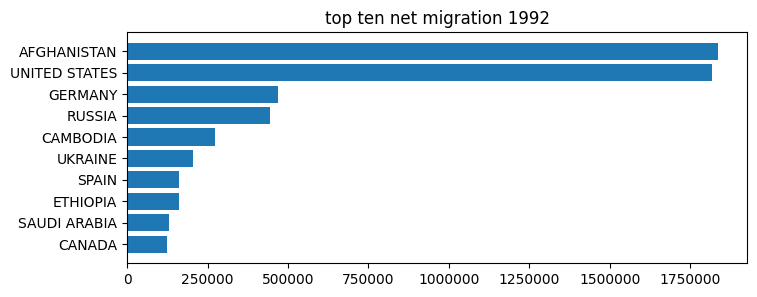

In [32]:
# Data
y_pos = [0, 1, 2, 3, 4,5,6,7,8,9]
performance = values

# Create the plot object
fig, ax = plt.subplots(figsize= (8,3))
ax.barh(y_pos, performance)

# Add labels
ax.set_yticks(y_pos)
ax.set_yticklabels(countries)

# Invert the y axis
ax.invert_yaxis()
# supress scientific notation
ax.ticklabel_format(style='plain', axis='x')
# title
plt.title("top ten net migration 1992")
# plot
plt.show()

### Late 2010s and 2020

In [33]:
filtered = df.sort_values(by=['net_migration_2018'], ascending = False).reset_index(drop=True).iloc[0:10]
countries = filtered.country_name.tolist()
values = filtered.net_migration_2018.tolist()

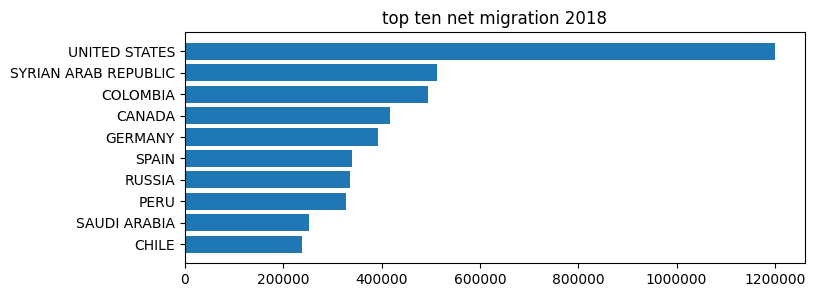

In [34]:
# Data
y_pos = [0, 1, 2, 3, 4,5,6,7,8,9]
performance = values

# Create the plot object
fig, ax = plt.subplots(figsize= (8,3))
ax.barh(y_pos, performance)

# Add labels
ax.set_yticks(y_pos)
ax.set_yticklabels(countries)

# Invert the y axis
ax.invert_yaxis()
# supress scientific notation
ax.ticklabel_format(style='plain', axis='x')
# title
plt.title("top ten net migration 2018")
# plot
plt.show()

In [35]:
filtered = df.sort_values(by=['net_migration_2019'], ascending = False).reset_index(drop=True).iloc[0:10]
countries = filtered.country_name.tolist()
values = filtered.net_migration_2019.tolist()

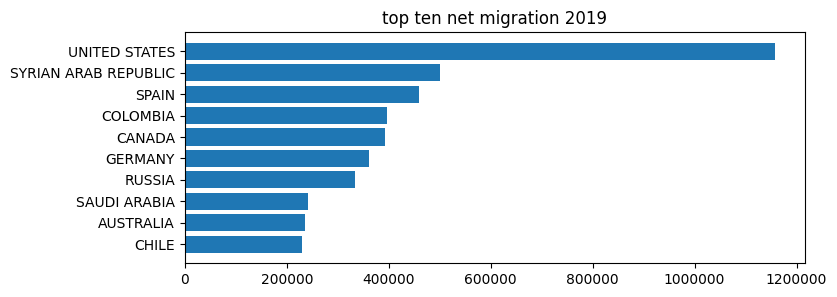

In [36]:
# Data
y_pos = [0, 1, 2, 3, 4,5,6,7,8,9]
performance = values

# Create the plot object
fig, ax = plt.subplots(figsize= (8,3))
ax.barh(y_pos, performance)

# Add labels
ax.set_yticks(y_pos)
ax.set_yticklabels(countries)

# Invert the y axis
ax.invert_yaxis()

# supress the scientific notation
ax.ticklabel_format(style='plain', axis='x')

# title
plt.title("top ten net migration 2019")
# plot
plt.show()

In [37]:
filtered = df.sort_values(by=['net_migration_2020'], ascending = False).reset_index(drop=True).iloc[0:10]
countries = filtered.country_name.tolist()
values = filtered.net_migration_2020.tolist()

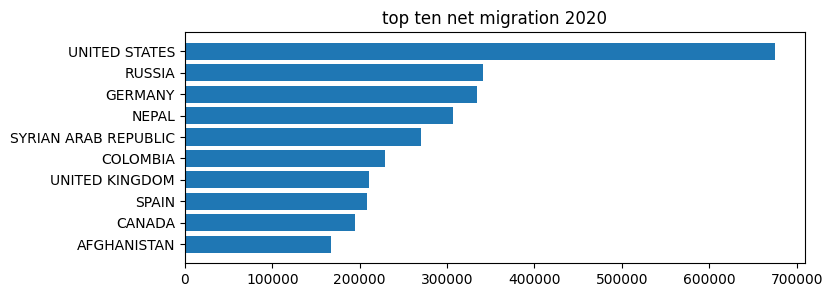

In [38]:
# Data
y_pos = [0, 1, 2, 3, 4,5,6,7,8,9]
performance = values

# Create the plot object
fig, ax = plt.subplots(figsize= (8,3))
ax.barh(y_pos, performance)

# Add labels
ax.set_yticks(y_pos)
ax.set_yticklabels(countries)

# Invert the y axis
ax.invert_yaxis()
# title
plt.title("top ten net migration 2020")
# plot
plt.show()

The presence of Afghanistan at the top of this chart calls our attention

## Countries with the lower net migration

### Early 90s

In [39]:
filtered = df.sort_values(by=['net_migration_1990'], ascending = True).reset_index(drop=True).iloc[0:10]
countries = filtered.country_name.tolist()
values = filtered.net_migration_1990.tolist()

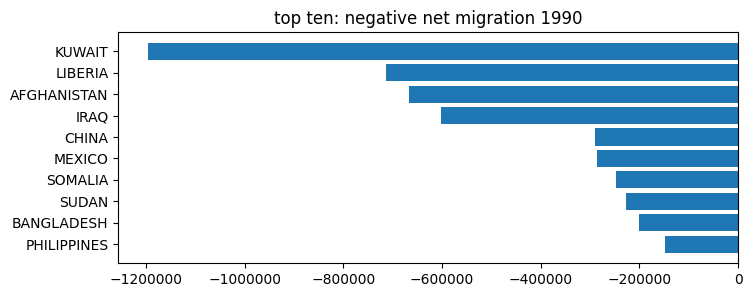

In [40]:
# Data
y_pos = [0, 1, 2, 3, 4,5,6,7,8,9]
performance = values

# Create the plot object
fig, ax = plt.subplots(figsize=(8,3))
ax.barh(y_pos, performance)

# Add labels
ax.set_yticks(y_pos)
ax.set_yticklabels(countries)

# supress scientific notation
ax.ticklabel_format(style='plain', axis='x')

# Invert the y axis
ax.invert_yaxis()

# title
plt.title("top ten: negative net migration 1990")

# plot
plt.show()

In [41]:
filtered = df.sort_values(by=['net_migration_1991'], ascending = True).reset_index(drop=True).iloc[0:10]
countries = filtered.country_name.tolist()
values = filtered.net_migration_1991.tolist()

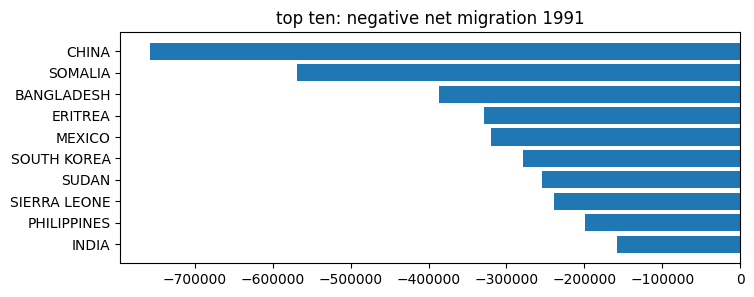

In [42]:
# Data
y_pos = [0, 1, 2, 3, 4,5,6,7,8,9]
performance = values

# Create the plot object
fig, ax = plt.subplots(figsize=(8,3))
ax.barh(y_pos, performance)

# Add labels
ax.set_yticks(y_pos)
ax.set_yticklabels(countries)

# supress scientific notation
ax.ticklabel_format(style='plain', axis='x')

# Invert the y axis
ax.invert_yaxis()

# title
plt.title("top ten: negative net migration 1991")

# plot
plt.show()

In [43]:
filtered = df.sort_values(by=['net_migration_1992'], ascending = True).reset_index(drop=True).iloc[0:10]
countries = filtered.country_name.tolist()
values = filtered.net_migration_1992.tolist()

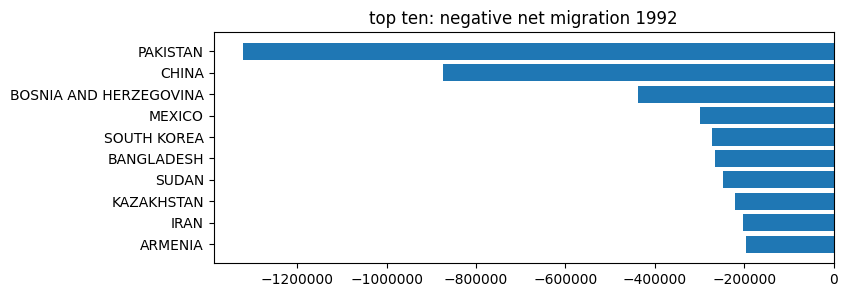

In [44]:
# Data
y_pos = [0, 1, 2, 3, 4,5,6,7,8,9]
performance = values

# Create the plot object
fig, ax = plt.subplots(figsize=(8,3))
ax.barh(y_pos, performance)

# Add labels
ax.set_yticks(y_pos)
ax.set_yticklabels(countries)

# supress scientific notation
ax.ticklabel_format(style='plain', axis='x')

# Invert the y axis
ax.invert_yaxis()

# title
plt.title("top ten: negative net migration 1992")

# plot
plt.show()

In [45]:
filtered = df.sort_values(by=['net_migration_2018'], ascending = True).reset_index(drop=True).iloc[0:10]
countries = filtered.country_name.tolist()
values = filtered.net_migration_2018.tolist()

### Late 2010s and 2020

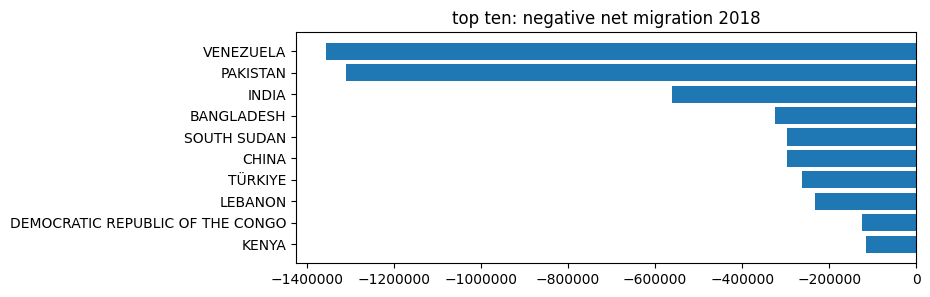

In [46]:
# Data
y_pos = [0, 1, 2, 3, 4,5,6,7,8,9]
performance = values

# Create the plot object
fig, ax = plt.subplots(figsize=(8,3))
ax.barh(y_pos, performance)

# Add labels
ax.set_yticks(y_pos)
ax.set_yticklabels(countries)

# supress scientific notation
ax.ticklabel_format(style='plain', axis='x')

# Invert the y axis
ax.invert_yaxis()

# title
plt.title("top ten: negative net migration 2018")

# plot
plt.show()

In [47]:
filtered = df.sort_values(by=['net_migration_2019'], ascending = True).reset_index(drop=True).iloc[0:10]
countries = filtered.country_name.tolist()
values = filtered.net_migration_2019.tolist()

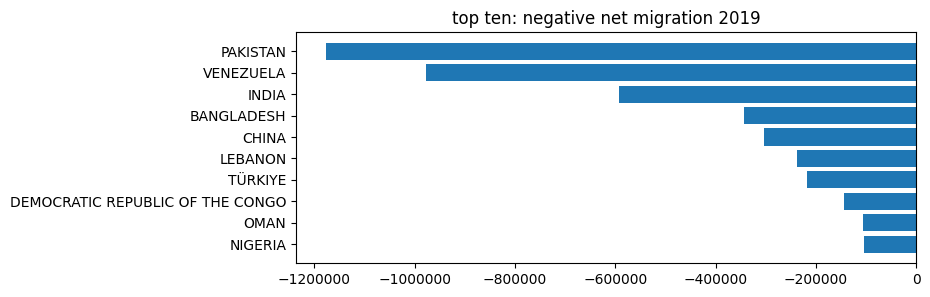

In [48]:
# Data
y_pos = [0, 1, 2, 3, 4,5,6,7,8,9]
performance = values

# Create the plot object
fig, ax = plt.subplots(figsize=(8,3))
ax.barh(y_pos, performance)

# Add labels
ax.set_yticks(y_pos)
ax.set_yticklabels(countries)

# supress scientific notation
ax.ticklabel_format(style='plain', axis='x')

# Invert the y axis
ax.invert_yaxis()

# title
plt.title("top ten: negative net migration 2019")

# plot
plt.show()

In [49]:
filtered = df.sort_values(by=['net_migration_2020'], ascending = True).reset_index(drop=True).iloc[0:10]
countries = filtered.country_name.tolist()
values = filtered.net_migration_2020.tolist()

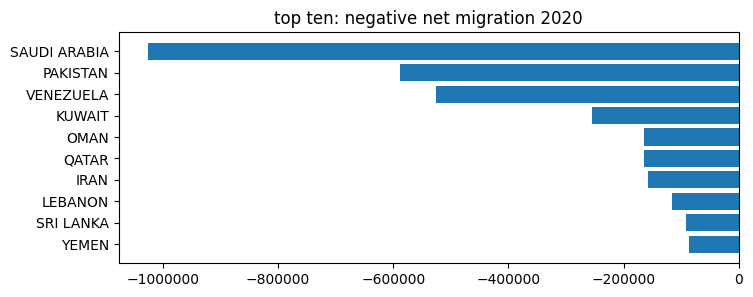

In [50]:
# Data
y_pos = [0, 1, 2, 3, 4,5,6,7,8,9]
performance = values

# Create the plot object
fig, ax = plt.subplots(figsize=(8,3))
ax.barh(y_pos, performance)

# Add labels
ax.set_yticks(y_pos)
ax.set_yticklabels(countries)

# supress scientific notation
ax.ticklabel_format(style='plain', axis='x')
# Invert the y axis
ax.invert_yaxis()

# title
plt.title("top ten: negative net migration 2020")
# plot
plt.show()

In [57]:
#df.to_csv('dataSets\\net_migration_countries_final.csv', index=False)